In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
folder = '../../results'

file = 'summarized-results.csv'
df = pd.read_csv(os.path.join(folder, file))

In [22]:
ONE_MILLION = 1_000_000

def normalize_score(df):
    
    df['Factor_normalized'] = df['Factor']
    
    if 'Throughput' in df['Benchmark Mode']:
        if df['Factor'] > 0:
            df['Factor_normalized'] = df['Original'] / df['Fixed']
        
    return df
    

df = df.apply(normalize_score, axis=1)

In [23]:
df[df['Benchmark Mode'] == 'Throughput, ops/time']


,Unnamed: 0,Benchmark Mode,Package,Class,Method,Full params,Unnamed: 5,Factor,Fixed,Original,Project,Experiment,Factor_normalized
41,41,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,iterArrayList1Element,NaN,0,0.000000,2.059188e+08,2.180308e+08,log4j2,FINA,0.000000
42,42,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,iterArrayList3Element,NaN,0,0.000000,1.251773e+08,1.282553e+08,log4j2,FINA,0.000000
43,43,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,iterArraySet1Element,NaN,0,0.897424,2.003572e+08,2.232580e+08,log4j2,FINA,1.114300
44,44,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,iterArraySet3Element,NaN,0,0.000000,1.220917e+08,1.173902e+08,log4j2,FINA,0.000000
45,45,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,iterMap1Element,NaN,0,0.000000,3.283869e+07,3.294531e+07,log4j2,FINA,0.000000
46,46,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,iterMap3Elements,NaN,0,0.000000,2.618470e+07,2.582523e+07,log4j2,FINA,0.000000
47,47,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,CollectionsBenchmark,testBaseline,NaN,0,0.000000,3.489484e+09,3.423731e+09,log4j2,FINA,0.000000
48,48,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,LoggerConfigBenchmark,logWithCountersAndLock,NaN,0,0.000000,1.710039e+07,1.699489e+07,log4j2,FINA,0.000000
49,49,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,LoggerConfigBenchmark,logWithCountersNoLocks,NaN,0,0.000000,2.788089e+07,2.835198e+07,log4j2,FINA,0.000000
50,50,"Throughput, ops/time",org.apache.logging.log4j.perf.jmh,LoggerConfigBenchmark,logWithCountersRetryAfterReconfig,NaN,0,0.000000,2.774186e+07,2.687915e+07,log4j2,FINA,0.000000


In [24]:
def generate_report(df):
    
    diff = len(df[df['Factor_normalized'] > 0.0])
    evaluated = len(df)
    return pd.DataFrame({
        'Evaluated': evaluated,
        'Impact': diff,
        '%': '%.2f' % (diff / evaluated * 100)
    }, index=df.name)
    

report = df.groupby(by=['Project','Experiment'], squeeze=True).apply(generate_report)

In [25]:
report = report.reset_index(level=2, drop=True).drop_duplicates()

In [26]:
report = report[['Evaluated', 'Impact', '%']] 

report


Evaluated  Impact       %
Project   Experiment                           
druid     FINA               13       2   15.38
          LOOP               65      56   86.15
          RETU               16       6   37.50
log4j2    FINA               55       9   16.36
          LOOP                8       7   87.50
          RETU               17      15   88.24
netty     FINA               50      35   70.00
          INVO              109     103   94.50
          LOOP                4       4  100.00
          SETUP               6       6  100.00
okio      FINA                7       3   42.86
          RETU                3       2   66.67
pgdbc     FINA               32       7   21.88
          FORK                9       9  100.00
          RETU               60      29   48.33
rxjava_2x RETU               30       3   10.00

In [27]:
latex = report.to_latex(multirow=True)

latex = latex.replace('FINA', '\\fina')
latex = latex.replace('LOOP', '\\benchloop')
latex = latex.replace('SETUP', '\\setu')
latex = latex.replace('SING', '\\sing')
latex = latex.replace('RETU', '\\retu')
latex = latex.replace('FORK', '\\fork')
latex = latex.replace('INVO', '\\invo')
print(latex)

\begin{tabular}{llrrl}
\toprule
      &      &  Evaluated &  Impact &       \% \\
Project & Experiment &            &         &         \\
\midrule
\multirow{3}{*}{druid} & \fina &         13 &       2 &   15.38 \\
      & \benchloop &         65 &      56 &   86.15 \\
      & \retu &         16 &       6 &   37.50 \\
\cline{1-5}
\multirow{3}{*}{log4j2} & \fina &         55 &       9 &   16.36 \\
      & \benchloop &          8 &       7 &   87.50 \\
      & \retu &         17 &      15 &   88.24 \\
\cline{1-5}
\multirow{4}{*}{netty} & \fina &         50 &      35 &   70.00 \\
      & \invo &        109 &     103 &   94.50 \\
      & \benchloop &          4 &       4 &  100.00 \\
      & \setu &          6 &       6 &  100.00 \\
\cline{1-5}
\multirow{2}{*}{okio} & \fina &          7 &       3 &   42.86 \\
      & \retu &          3 &       2 &   66.67 \\
\cline{1-5}
\multirow{3}{*}{pgdbc} & \fina &         32 &       7 &   21.88 \\
      & \fork &          9 &       9 &  100.00 \\
    

In [28]:
relevant_cols = ['Project', 'Class', 'Method', 'Full params', 'Original', 'Benchmark Mode', 'Fixed', 'Factor_normalized']
sns.set(color_codes=True)

latex_cols = ['Impact', 'Project', 'Benchmark', 'Benchmark Mode', 'Original', 'Fixed', 'Factor_normalized']

def generate_table(df):
    
    print('Experiment = %s' % df['Experiment'])
    
    # Filter non relevant comparisons
    df = df[df.Factor_normalized > 0]
    df = df[relevant_cols]
    sorted_ = df.sort_values(by='Factor_normalized')
    speedup = sorted_[:20]
    speedup['Impact'] = 'Speedup'
    
    slowdown = sorted_[-20:]
    slowdown['Impact'] = 'Slowdown'
    
    r = speedup.append(slowdown)
    r['Original'] = r['Original'].map('{:.2f}'.format)
    r['Fixed'] = r['Fixed'].map('{:.2f}'.format)
    r['Factor_normalized'] = r['Factor_normalized'].map('{:.2f}'.format)
    
    r['Benchmark'] = r['Class'] + "." + r['Method'] 
    
    print(r[latex_cols].to_latex(multirow=True, index=False))
    
    return r
    

results = df.groupby('Experiment').apply(generate_table)

Experiment = 0      FINA
1      FINA
2      FINA
3      FINA
4      FINA
5      FINA
6      FINA
7      FINA
8      FINA
9      FINA
10     FINA
11     FINA
12     FINA
13     FINA
14     FINA
15     FINA
16     FINA
17     FINA
18     FINA
19     FINA
20     FINA
21     FINA
22     FINA
23     FINA
24     FINA
25     FINA
26     FINA
27     FINA
28     FINA
29     FINA
       ... 
385    FINA
386    FINA
387    FINA
388    FINA
389    FINA
390    FINA
391    FINA
392    FINA
393    FINA
394    FINA
395    FINA
396    FINA
397    FINA
398    FINA
399    FINA
400    FINA
401    FINA
402    FINA
403    FINA
404    FINA
405    FINA
406    FINA
407    FINA
408    FINA
409    FINA
410    FINA
411    FINA
412    FINA
413    FINA
414    FINA
Name: Experiment, Length: 157, dtype: object
\begin{tabular}{lllllll}
\toprule
   Impact & Project &                                          Benchmark &         Benchmark Mode &      Original &         Fixed & Factor\_normalized \\
\midrule
  Speedup &  

\begin{tabular}{lllllll}
\toprule
   Impact & Project &                                          Benchmark &         Benchmark Mode &      Original &         Fixed & Factor\_normalized \\
\midrule
  Speedup &  log4j2 &          CollectionsBenchmark.iterArraySet3Element &   Throughput, ops/time &  120885917.93 &  124166183.14 &              0.97 \\
  Speedup &  log4j2 &               CollectionsBenchmark.iterMap1Element &   Throughput, ops/time &   33124683.80 &   33233467.68 &              1.00 \\
  Speedup &   druid &             FloatCompressionBenchmark.readSkipping &  Average time, time/op &          2.15 &          2.14 &              1.00 \\
  Speedup &   druid &            FilterPartitionBenchmark.timeFilterNone &  Average time, time/op &     116073.80 &     115995.80 &              1.00 \\
  Speedup &   druid &              LongCompressionBenchmark.readSkipping &  Average time, time/op &         35.25 &         35.23 &              1.00 \\
  Speedup &   druid &              Lon

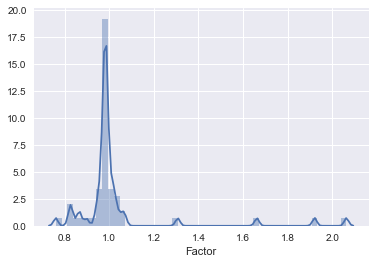

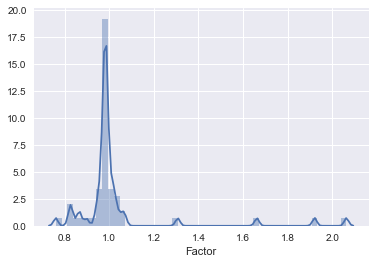

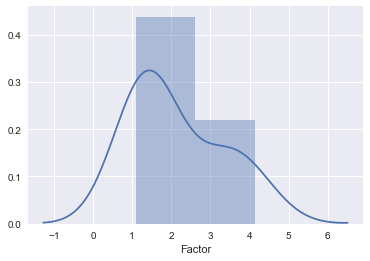

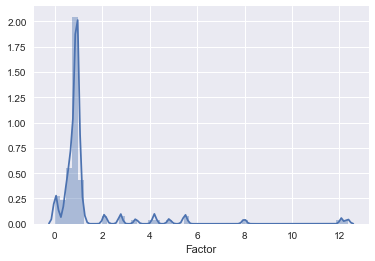

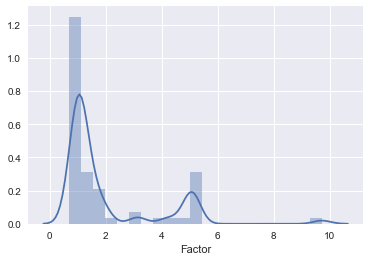

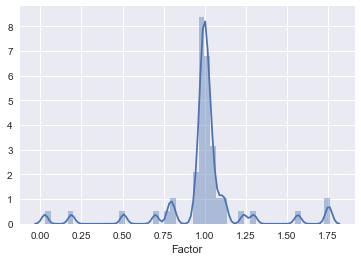

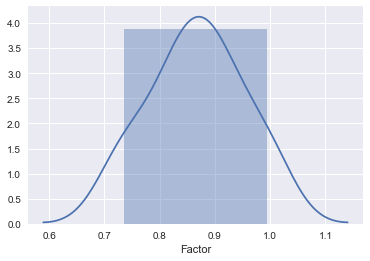

In [29]:

def generate_distchart(df):
    
    values = df[df.Factor > 0]
    sns.distplot(values.Factor)
    plt.show()
    
    pass
    

results = df.groupby('Experiment').apply(generate_distchart)